In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [ ]:
# Load the dataset (example: LFW dataset)
lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
X = lfw_data.images  # Image data
y = lfw_data.target  # Labels (person ids)

# Normalize images and add channel dimension (greyscale)
X = X / 255.0  # Normalize images to range [0, 1]
X = np.expand_dims(X, -1)  # Add a channel dimension (since it's grayscale)

In [ ]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the CNN model
model = models.Sequential()

# Add Input layer to specify input shape
model.add(layers.Input(shape=(X.shape[1], X.shape[2], 1)))

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(np.unique(y)), activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use reduced data augmentation (no shear, rotation, etc.)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,  # Limited zoom augmentation
    horizontal_flip=True,  # Flip augmentation
)

# Fit the model with augmented data
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,  # Use fewer epochs to avoid overfitting
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.3709 - loss: 1.8330 - val_accuracy: 0.4612 - val_loss: 1.5927
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.3709 - loss: 1.7676 - val_accuracy: 0.4612 - val_loss: 1.6047
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4003 - loss: 1.7014 - val_accuracy: 0.4612 - val_loss: 1.6114
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4064 - loss: 1.7003 - val_accuracy: 0.4612 - val_loss: 1.6301
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.4012 - loss: 1.7068 - val_accuracy: 0.4612 - val_loss: 1.6026
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.4127 - loss: 1.6869 - val_accuracy: 0.4612 - val_loss: 1.6187
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3894 - loss: 1.7061 - val_accuracy: 0.4612 - val_loss: 1.6128
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.3835 - loss: 1.7202 - val_accuracy: 0.4612 - val_loss: 

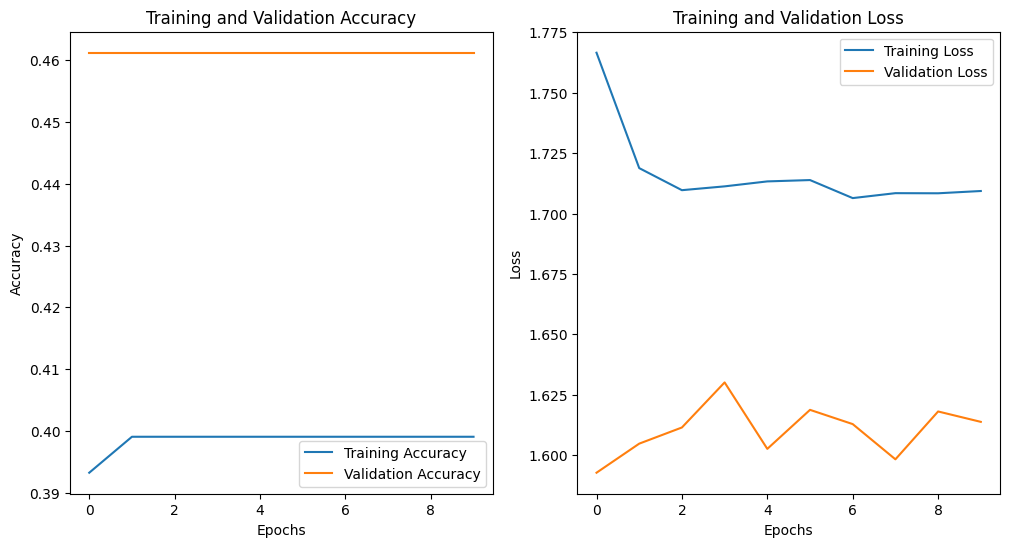

In [ ]:
# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()  # Display the plots

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5007 - loss: 1.5621
Test accuracy: 46.12%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


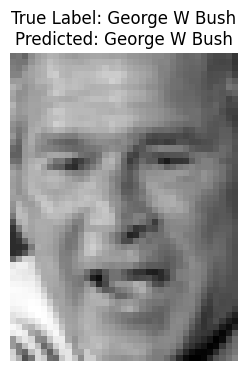

In [ ]:
# Display a sample image from the test set along with the prediction
sample_idx = np.random.choice(len(X_test))  # Select a random test image
sample_image = X_test[sample_idx]
sample_label = y_test[sample_idx]
sample_prediction = model.predict(np.expand_dims(sample_image, axis=0))  # Predict the label

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {lfw_data.target_names[sample_label]}\nPredicted: {lfw_data.target_names[np.argmax(sample_prediction)]}")
plt.axis('off')  # Hide the axis
plt.show()